# The Power Plant Energy

## Project Description
The task is to predict the net hourly electrical energy output (EP) of various power plants, given a number of features for each plant:
- Ambient Temperature (C)
- Exhaust Vacuum (cm Hg)
- Ambient Pressure (milibar)
- Relative Humidity (%)

## 1. Imports

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## 2. Import and Show First 5 Rows of the Dataset

In [38]:
data = pd.read_csv('./Power Plant Data.csv')
data.head()

,Ambient Temperature (C),Exhaust Vacuum (cm Hg),Ambient Pressure (milibar),Relative Humidity (%),Hourly Electrical Energy output (MW)
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## 3. Preprocessing the Data for Machine Learning

### 3.1. Split into features (X) and target variable (y)

In [39]:
X = data[['Ambient Temperature (C) ', 'Ambient Pressure (milibar)', 'Relative Humidity (%)', 'Exhaust Vacuum (cm Hg)']]
y = data['Hourly Electrical Energy output (MW)']

### 3.2. Split into training and testing sets (80% train, 20% test)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.3 Feature Scaling

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Train the Multiple Regression Model with the Training set

In [42]:
multiple_regression_model = LinearRegression()
multiple_regression_model.fit(X_train_scaled, y_train)  # train
y_pred_multiple_regression = multiple_regression_model.predict(X_test_scaled)

## 5. Train the SVM Regression Model with the Training Set

In [43]:
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)  # train
y_pred_svm = svm_model.predict(X_test_scaled)

## 6. Check and Compare the Trained Models with the Test Set

In [44]:
mse_multiple_regression = mean_squared_error(y_test, y_pred_multiple_regression)
r2_multiple_regression = r2_score(y_test, y_pred_multiple_regression)

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("=========Multiple Regression Results=========")
print("Mean Squared Error:", mse_multiple_regression)
print("R2 score:", r2_multiple_regression)
print("=============================================")

print("\n==========SVM Regression Results===========")
print("Mean Squared Error:", mse_svm)
print("R2 score:", r2_svm)
print("=============================================")

=========Multiple Regression Results=========
Mean Squared Error: 20.27370599968744
R2 score: 0.9301046431962188

==========SVM Regression Results===========
Mean Squared Error: 20.558899134107175
R2 score: 0.9291214151722668


## 7. Visually Compare the Trained Models

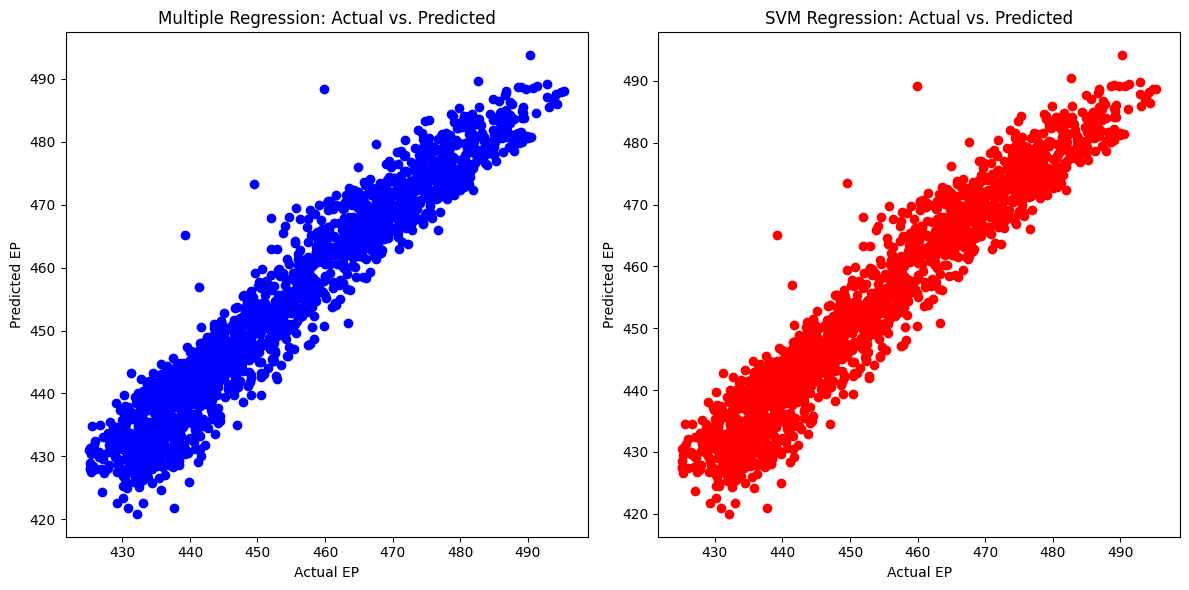

In [45]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_multiple_regression, color='blue')
plt.xlabel('Actual EP')
plt.ylabel('Predicted EP')
plt.title('Multiple Regression: Actual vs. Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_svm, color='red')
plt.xlabel('Actual EP')
plt.ylabel('Predicted EP')
plt.title('SVM Regression: Actual vs. Predicted')

plt.tight_layout()
plt.show()